# <center>How to get a second date ?</center> 

![](speed-dating.png)

In [14]:
#plt.savefig pour exporter les graphs

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Raw code is hidden for clarity. <a href="javascript:code_toggle()">On/Off</a>''')

### 1. Introduction

**Aperçu du dataset :** 

In [224]:
dating = pd.read_csv("speed_dating_data.csv",encoding="ISO-8859-1")

In [76]:
dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [373]:
dating.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


*Nombre de lignes et de colonnes du dataset :*

In [14]:
dating.shape

(8378, 195)

### 2. Les Matchs

**Nombre de matchs:**  
*(0=Non / 1=Oui)*

In [225]:
dating["match"].value_counts()

0    6998
1    1380
Name: match, dtype: int64

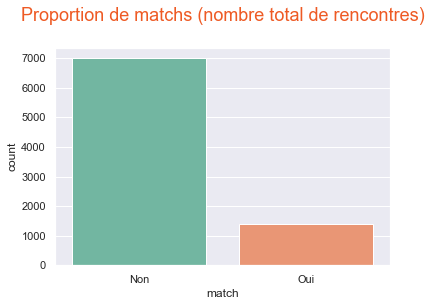

In [382]:
sns.countplot(dating["match"].map(lambda x: 'Oui' if x==1 else 'Non'),palette="Set2")
plt.title("Proportion de matchs (nombre total de rencontres)\n", fontsize=18, color="#EE5A24");

**On peut voir que très peu de matchs ont lieu. Environ 16% du nombre de rencontres total.**

**Ces données concernent le nombre total de rencontres. On veut s'intéresser au nombre de personnes réel.**

In [287]:
dating_no_duplicates = dating.drop_duplicates(subset=["pid"])

In [378]:
dating_no_duplicates.shape

(552, 195)

In [379]:
dating_no_duplicates["match"].value_counts()

0    469
1     83
Name: match, dtype: int64

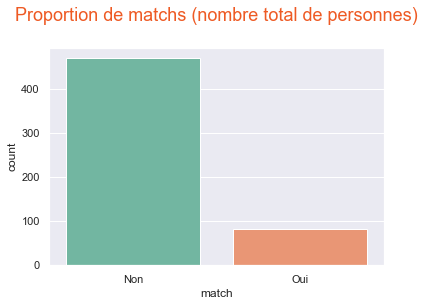

In [383]:
sns.countplot(dating_no_duplicates["match"].map(lambda x: 'Oui' if x==1 else 'Non'),palette="Set2")
plt.title("Proportion de matchs (nombre total de personnes)\n", fontsize=18, color="#EE5A24");

**Sur 552 personnes ayant participé à l'évenement, seulement 83 ont eu au moins 1 match. Soit 15% de la population.** 

### 3. Combien de second dates ? 

*3/4 semaines après l'évenement, les participants ont du communiquer le nombre de matchs avec lesquels ils sont réellement allé en second date.*

*La variable 'date_3' represente le nombre de second dates que les personnes ont eu avec leurs matchs.* 

*Valeurs manquantes :*

In [454]:
dating_match_second = dating_no_duplicates[dating_no_duplicates["match"]==1]["date_3"]
dating_match_second.isna().value_counts()

False    49
True     34
Name: date_3, dtype: int64

*Sur les 83 personnes ayant eu un match, 34 valeurs manquantes. Etant donné la nature de la question on peut supposer que les personnes n'ayant pas eu de second date n'ont pas répondu. On peut remplacer les valeurs manquantes par "0"*

In [455]:
dating_match_second = dating_match_second.fillna(0)

*Check*

In [460]:
dating_match_second.isna().value_counts()

False    83
Name: date_3, dtype: int64

Proportion de second dates :

In [461]:
dating_match_second.value_counts()

0.0    59
1.0    24
Name: date_3, dtype: int64

In [475]:
replace_map = {0:"Non",1:"Oui"}
dating_match_second = dating_match_second.replace(replace_map)

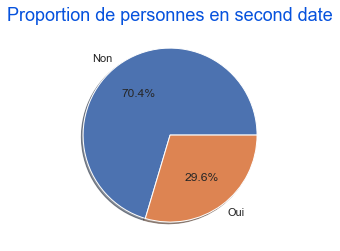

In [476]:
sizes = dating_match_second.value_counts(normalize=True).values
labels = dating_match_second.value_counts(normalize=True).index
plt.pie(sizes,labels=labels, autopct='%1.1f%%',shadow=True)
plt.title("Proportion de personnes en second date", fontsize=18, color="#0652DD");

**24 personnes ont eu au moins 1 second date, soit environ 30%**

### 4. Comment peut on expliquer le fait d'aller en second date ?

*Peut-être par les traits de caractère :*

In [520]:
dating_match = dating_no_duplicates[dating_no_duplicates["match"]==1]

In [485]:
date_3 = dating_match.loc[:,["pid","date_3"]]
                                 

In [506]:
traits = dating_match.groupby("pid")[["date_3",'attr','sinc','intel','fun','amb','shar','like']].mean()

**DataFrame des traits de caractère moyens pour les 83 personnes qui ont eu au moins un match.** 

In [513]:
traits.head()

,date_3,attr,sinc,intel,fun,amb,shar,like
pid,,,,,,,,
13.0,0.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0
14.0,0.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0
15.0,0.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0
19.0,0.0,7.0,6.0,8.0,9.0,8.0,8.0,7.0
60.0,NaN,5.0,8.0,7.0,8.0,8.0,6.0,6.0


In [488]:
traits.shape

(83, 7)

In [527]:
traits_date_oui = traits[traits["date_3"]==1].iloc[:,2:]
traits_date_non = traits[traits["date_3"]==0].iloc[:,2:]

**Traits de caractère moyens des personnes n'ayant pas eu de second date :** 

In [533]:
traits_date_non.mean()

sinc     7.913043
intel    8.400000
fun      7.800000
amb      7.791667
shar     7.160000
like     8.000000
dtype: float64

**Traits de caractère moyens des personnes ayant eu un second date :** 

In [531]:
traits_date_oui.mean()

sinc     7.666667
intel    7.833333
fun      8.166667
amb      7.909091
shar     7.150000
like     7.041667
dtype: float64

### Faut-il entreprendre pour arriver à ses fins ? 

In [604]:
them_call = dating_match.groupby("pid")[["date_3","gender",'them_cal']].mean()

In [605]:
them_call_date_oui_homme = them_call[(them_call["date_3"]==1)&(them_call["gender"]==1)].iloc[:,-1:]
them_call_date_non_homme = them_call[(them_call["date_3"]==0)&(them_call["gender"]==1)].iloc[:,-1:]

**Chez les hommes:**

**Qui ont eu un second date :**

In [568]:
them_call_date_oui_homme.mean()

them_cal    1.076923
dtype: float64

**Qui n'ont pas eu de second date:**

In [569]:
them_call_date_non_homme.mean()

them_cal    0.4
dtype: float64

In [570]:
them_call_date_oui_femme = them_call[(them_call["date_3"]==1)&(them_call["gender"]==0)].iloc[:,-1:]
them_call_date_non_femme = them_call[(them_call["date_3"]==0)&(them_call["gender"]==0)].iloc[:,-1:]

**Chez les femmes:**

**Qui ont eu un second date :**

In [571]:
them_call_date_oui_femme.mean()

them_cal    3.636364
dtype: float64

**Qui n'ont pas eu de second date:**

In [572]:
them_call_date_non_femme.mean()

them_cal    1.65
dtype: float64

In [608]:
replace_map_2 = {0:"Femmes",1:"Hommes"}
them_call["gender"] = them_call["gender"].replace(replace_map_2)
them_call["date_3"] = them_call["date_3"].replace(replace_map)

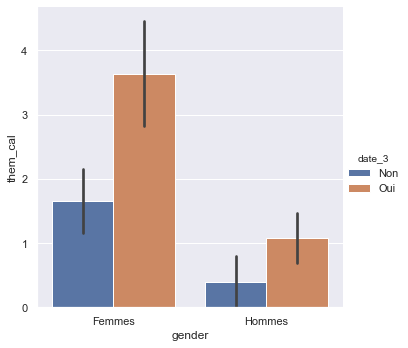

In [609]:
sns.catplot("gender","them_cal",data=them_call, kind="bar", hue="date_3");

**Conclusion : les femmes ne font pas le premier pas : pour aller en date elle se font contacter en moyenne 3.63 contre 1.07 pour les hommes**